# 3.5 - Multi-class classification
Reuters dataset subjects classification. Every data sample can be assigned to only one category. There are 46 independent subjects. Task is conclusive.

## Load data

In [1]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2121728/2110848 [==============================] - 0s 0us/step


In [2]:
len(train_data)

8982

In [3]:
len(test_data)

2246

In [6]:
train_data[10][:10]

[1, 245, 273, 207, 156, 53, 74, 160, 26, 14]

In [9]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire=' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])

In [10]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

## Prepare data
Vectorize data

In [11]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [12]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

In [13]:
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [14]:
# built in Keras to_one_hot:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

## NN model
In this case, we have more than 2 output classes. So output space needs to have much more dimensions that in binary classification.

To avoid loosing some information, we're gonna extend layers size, so instead previous 16, know we will have 64 dimensions.

In [15]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

- Network has *Dense* layer with size 46 - expected class number. So each data sample will generate 46-dim vector of probabilities. Each element will corespond to the another class.
- *Softmax* activation method is for generating probability distribution for 46 different classes. All values in each prediction vector sums to 1.

To calculate loss value for multi-class values, we need to use *categorical cross-entropy*. It calculates distance between distribution of real and predicted probabilities.

In [16]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Train & validate model

In [17]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [19]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 52ms/step - loss: 2.6103 - accuracy: 0.5353 - val_loss: 1.6992 - val_accuracy: 0.6670
Epoch 2/20
16/16 [==============================] - 1s 68ms/step - loss: 1.3909 - accuracy: 0.7199 - val_loss: 1.2980 - val_accuracy: 0.7290
Epoch 3/20
16/16 [==============================] - 1s 75ms/step - loss: 1.0424 - accuracy: 0.7833 - val_loss: 1.1467 - val_accuracy: 0.7510
Epoch 4/20
16/16 [==============================] - 1s 52ms/step - loss: 0.8184 - accuracy: 0.8281 - val_loss: 1.0391 - val_accuracy: 0.7850
Epoch 5/20
16/16 [==============================] - 1s 35ms/step - loss: 0.6533 - accuracy: 0.8643 - val_loss: 0.9666 - val_accuracy: 0.7980
Epoch 6/20
16/16 [==============================] - 1s 36ms/step - loss: 0.5219 - accuracy: 0.8911 - val_loss: 0.9657 - val_accuracy: 0.7950
Epoch 7/20
16/16 [==============================] - 1s 37ms/step - loss: 0.4226 - accuracy: 0.9104 - val_loss: 0.9127 - val_accuracy: 0.8100
Epoch 8/20
16

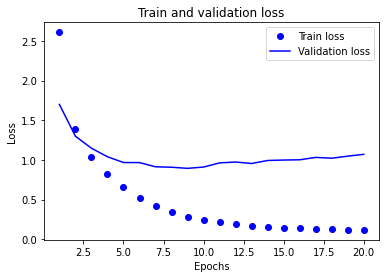

In [21]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label="Train loss")
plt.plot(epochs, val_loss, 'b', label="Validation loss")
plt.title("Train and validation loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

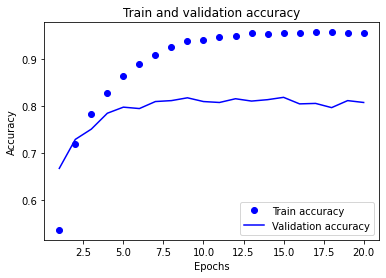

In [26]:
plt.clf()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label="Train accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation accuracy")
plt.title("Train and validation accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

After 9 epochs overfitting is starting. Let's try running training for only 9 epochs.

In [27]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(partial_x_train, partial_y_train, epochs=8, batch_size=512, validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/8
16/16 [==============================] - 1s 30ms/step - loss: 2.6019 - accuracy: 0.5254 - val_loss: 1.6988 - val_accuracy: 0.6400
Epoch 2/8
16/16 [==============================] - 0s 24ms/step - loss: 1.3863 - accuracy: 0.7093 - val_loss: 1.3157 - val_accuracy: 0.7130
Epoch 3/8
16/16 [==============================] - 0s 24ms/step - loss: 1.0292 - accuracy: 0.7786 - val_loss: 1.1266 - val_accuracy: 0.7670
Epoch 4/8
16/16 [==============================] - 0s 24ms/step - loss: 0.8094 - accuracy: 0.8281 - val_loss: 1.0529 - val_accuracy: 0.7630
Epoch 5/8
16/16 [==============================] - 0s 31ms/step - loss: 0.6445 - accuracy: 0.8623 - val_loss: 1.0017 - val_accuracy: 0.7870
Epoch 6/8
16/16 [==============================] - 1s 34ms/step - loss: 0.5179 - accuracy: 0.8890 - val_loss: 0.9467 - val_accuracy: 0.8000
Epoch 7/8
16/16 [==============================] - 1s 35ms/step - loss: 0.4186 - accuracy: 0.9128 - val_loss: 0.9385 - val_accuracy: 0.7970
Epoch 8/8
71/71 [===

In [28]:
results

[1.002670168876648, 0.7813891172409058]

## Predict data

In [29]:
predictions = model.predict(x_test)

In [35]:
index = 33
print("Example prediction sample:\n\tId: {}\n\tShape: {}\n\tClass: {}".format(index, predictions[index].shape, np.argmax(predictions[index])))

Example prediction sample:
	Id: 33
	Shape: (46,)
	Class: 3


## Summary
- For *N* classes predicting, model needs to have last layer with size *N*
- For multi classes conclusive labels, we use *Softmax* activation method to predict
- For multi classes we use *categorical cross-entropy*
- We can use multi classes labels in 2 different ways:
    - code labels into *one_hot* labels and use *categorical cross-entropy*,
    - use labels as numbers and use *sparse categorical cross-entropy*
- While predicting many classes, hidden layers shouldn't contain *botlle necks* - dimension of layer should be higher than output labels number